### Import Necessary Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# Setting up visualization aesthetics
sns.set(style="whitegrid")
plt.style.use('seaborn-whitegrid')

C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_3840\4175537853.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Load and Inspect the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Display the first few rows of the dataset to inspect
df.head()

country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743

In [5]:
# Display the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [6]:
# Basic statistics of the dataset
df.describe()

year         value
count  13953.000000  1.395300e+04
mean    1990.732316  8.254983e+05
std       17.187585  2.788923e+06
min     1960.000000 -8.067400e+01
25%     1976.000000  1.100000e+03
50%     1992.000000  1.390000e+04
75%     2006.000000  1.642779e+05
max     2019.000000  3.434401e+07

### Rename Columns

In [7]:
# Rename columns for easier access
df.rename(columns={
    'country_code': 'Country_Code',
    'country_name': 'Country',
    'year': 'Year',
    'value': 'CO2_emissions'
}, inplace=True)

# Confirm renaming
df.head()


Country_Code Country  Year  CO2_emissions
0          ABW   Aruba  1960      11092.675
1          ABW   Aruba  1961      11576.719
2          ABW   Aruba  1962      12713.489
3          ABW   Aruba  1963      12178.107
4          ABW   Aruba  1964      11840.743

### Handle Missing Data

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handling missing data (if any)
# We can drop rows with missing values or fill them with appropriate values (e.g., mean/median)
# df = df.dropna()

# Confirm there are no missing values left
# df.isnull().sum()

Country_Code     0
Country          0
Year             0
CO2_emissions    0
dtype: int64


### EDA

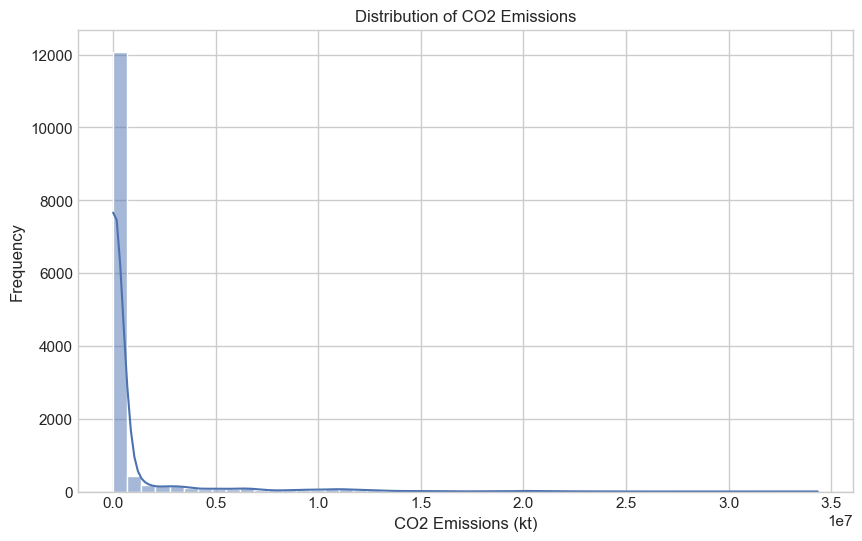

In [9]:
# Summary statistics for CO2 emissions
df['CO2_emissions'].describe()

# Distribution of CO2 emissions
plt.figure(figsize=(10,6))
sns.histplot(df['CO2_emissions'], bins=50, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Frequency')
plt.show()

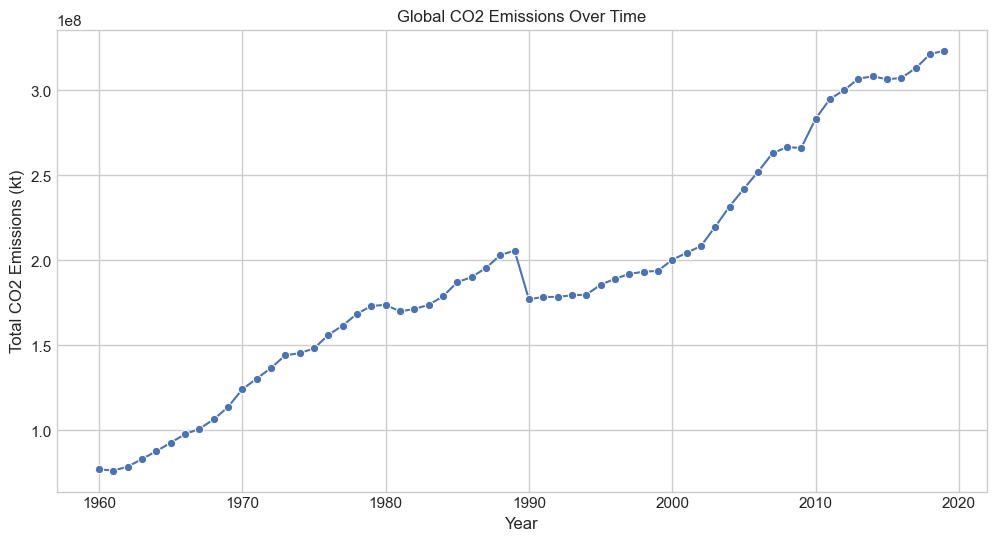

In [10]:
# CO2 emissions over time (globally)
df_global = df.groupby('Year')['CO2_emissions'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='CO2_emissions', data=df_global, marker='o')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kt)')
plt.show()

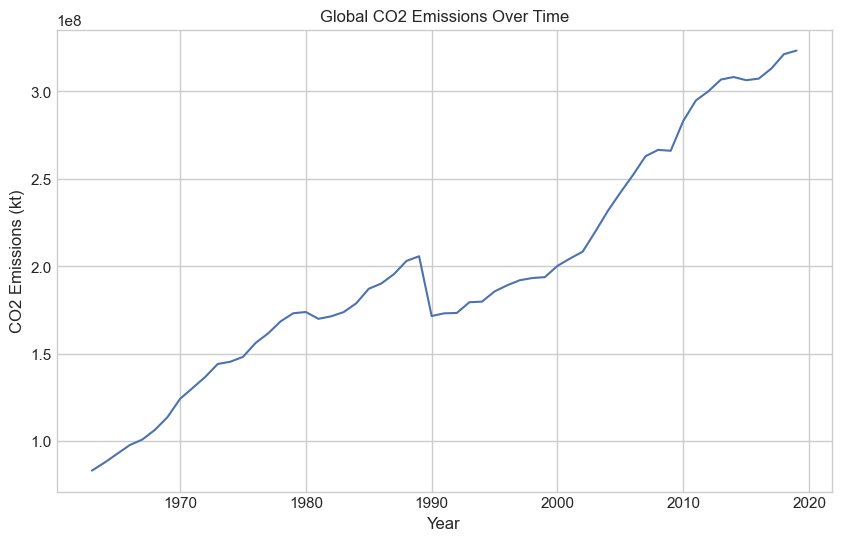

In [36]:
# Global CO2 Emissions Trends
plt.figure(figsize=(10, 6))
df.groupby('Year')['CO2_emissions'].sum().plot()
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.show()

### # Country-Level Trends: Top 10 Emitting Countries

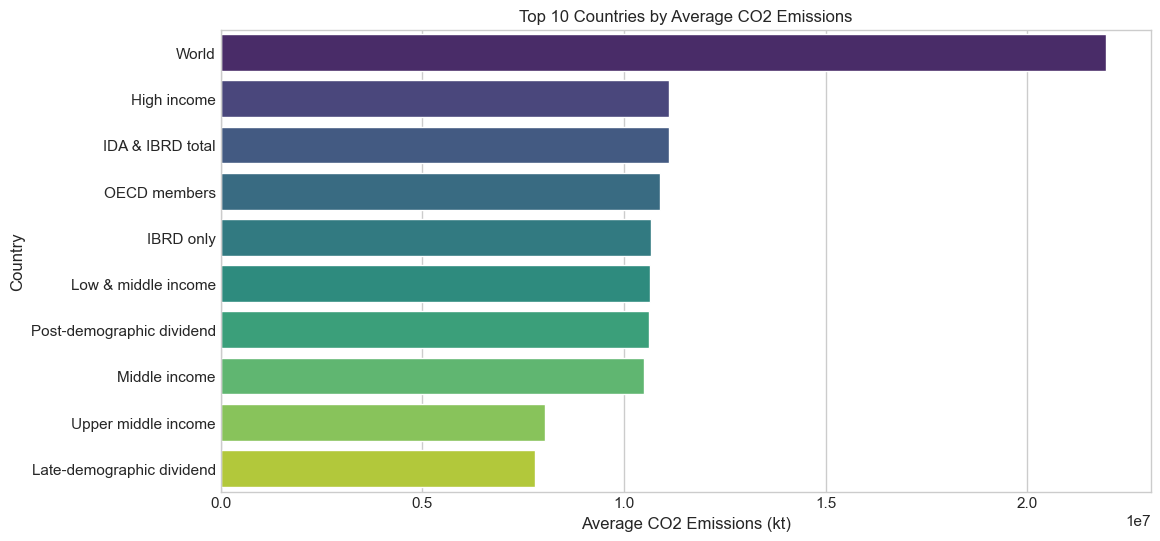

In [11]:
# barplot
top_countries = df.groupby('Country')['CO2_emissions'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='CO2_emissions', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Average CO2 Emissions')
plt.xlabel('Average CO2 Emissions (kt)')
plt.ylabel('Country')
plt.show()

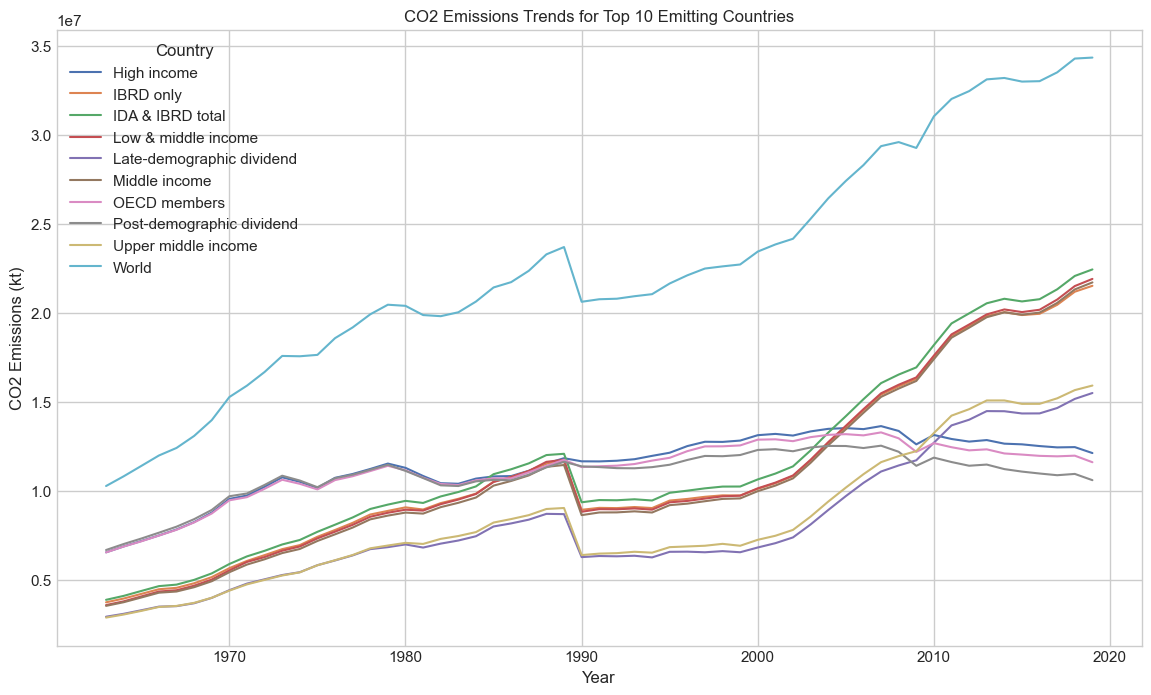

In [38]:
# Line plot
top_emitters = df.groupby('Country')['CO2_emissions'].sum().nlargest(10).index
df_top_emitters = df[df['Country'].isin(top_emitters)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_emitters, x='Year', y='CO2_emissions', hue='Country')
plt.title('CO2 Emissions Trends for Top 10 Emitting Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.show()

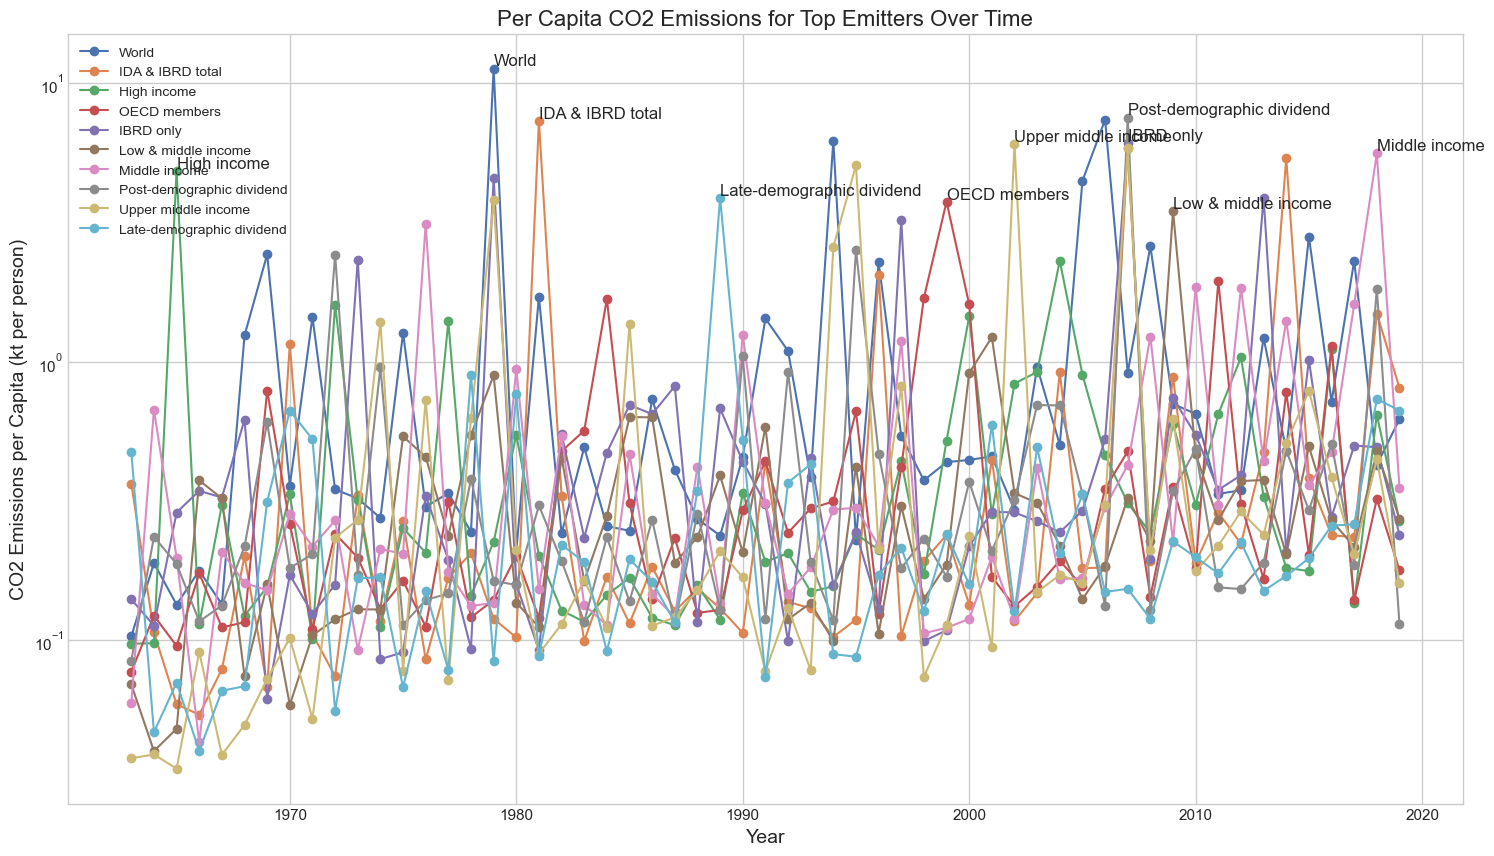

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the dataset has population data or we can add hypothetical values
# df['CO2_per_capita'] = df['CO2_emissions'] / df['Population']

# Example with a sample population data (randomly generated)
np.random.seed(42)
df['Population'] = np.random.randint(1e6, 1e8, df.shape[0])
df['CO2_per_capita'] = df['CO2_emissions'] / df['Population']

# Visualizing per capita emissions for top emitters
plt.figure(figsize=(18, 10))
for country in top_emitters:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_per_capita'], marker='o', label=country)
    
    # Find the highest point and label it
    max_idx = country_data['CO2_per_capita'].idxmax()
    max_year = country_data.loc[max_idx, 'Year']
    max_value = country_data.loc[max_idx, 'CO2_per_capita']
    plt.text(max_year, max_value, country, fontsize=12, ha='left', va='bottom')

plt.title('Per Capita CO2 Emissions for Top Emitters Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions per Capita (kt per person)', fontsize=14)
plt.yscale('log')  # Optional: Use logarithmic scale if there is a wide range of values
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()


C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



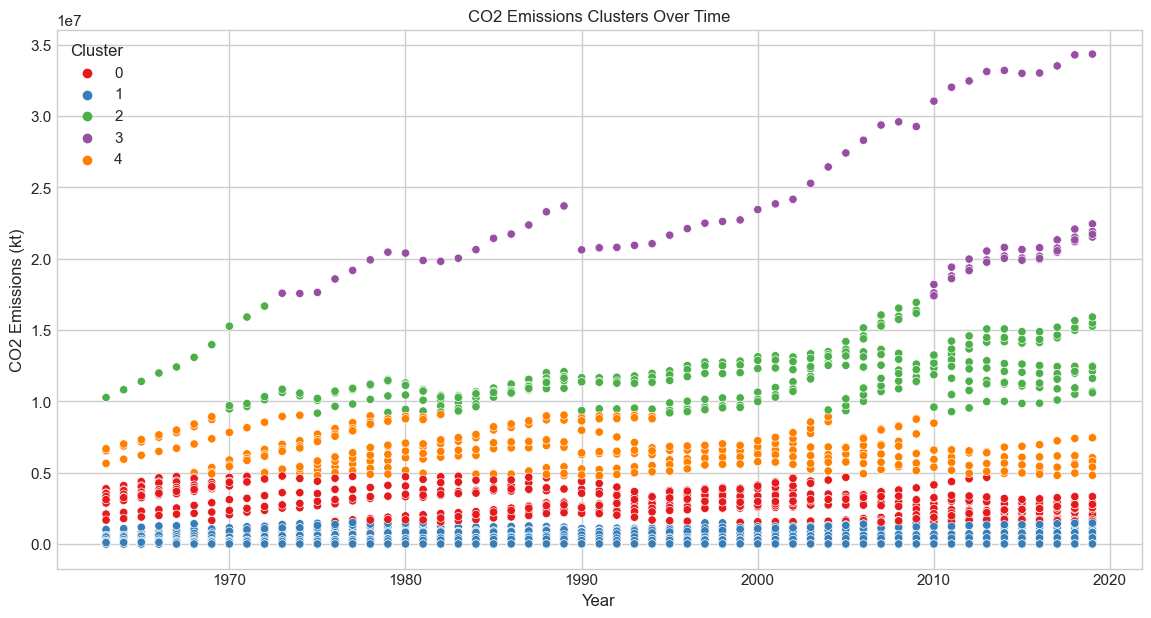

In [68]:
# Simplifying by assuming regions based on a mapping or by clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df[['CO2_emissions']])
df['Cluster'] = kmeans.labels_

# Visualizing cluster distribution
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Year', y='CO2_emissions', hue='Cluster', palette='Set1')
plt.title('CO2 Emissions Clusters Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()

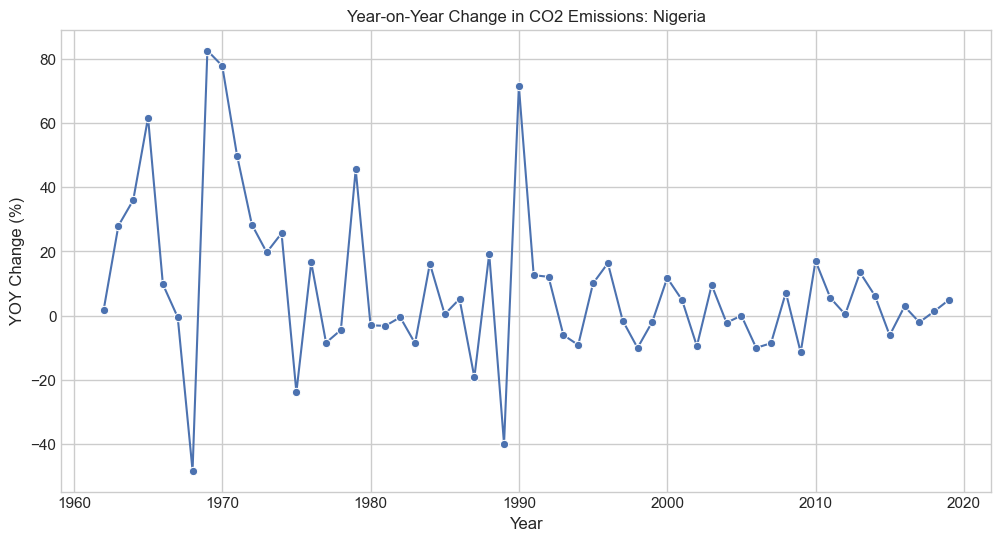

In [13]:
# Calculate the year-on-year change in CO2 emissions
df['YOY_change'] = df.groupby('Country')['CO2_emissions'].pct_change() * 100

# Drop NaN values resulting from pct_change calculation
df.dropna(subset=['YOY_change'], inplace=True)

# Visualize the year-on-year change for a specific country (e.g., USA)
df_usa = df[df['Country'] == 'Nigeria']

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='YOY_change', data=df_usa, marker='o')
plt.title('Year-on-Year Change in CO2 Emissions: Nigeria')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.show()

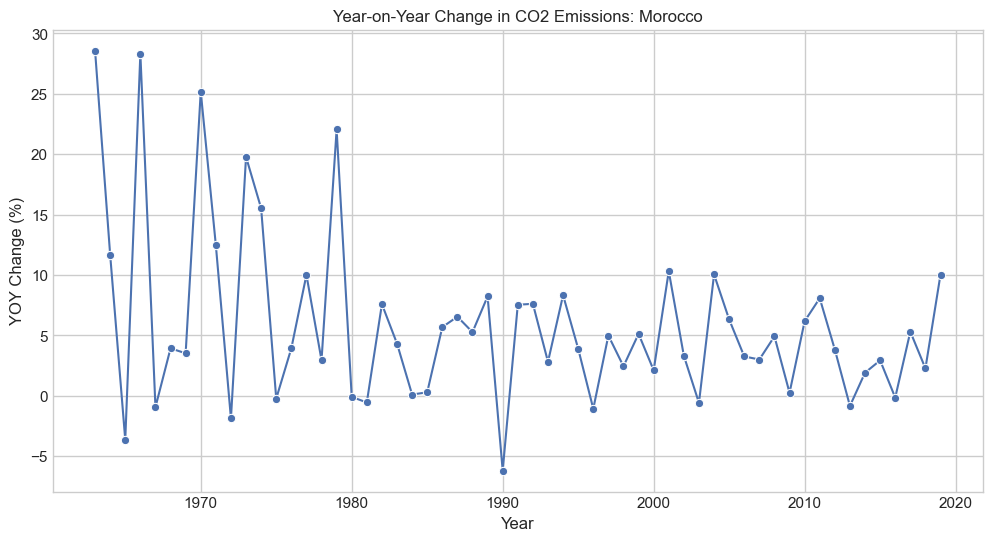

In [14]:
# Calculate the year-on-year change in CO2 emissions
df['YOY_change'] = df.groupby('Country')['CO2_emissions'].pct_change() * 100

# Drop NaN values resulting from pct_change calculation
df.dropna(subset=['YOY_change'], inplace=True)

# Visualize the year-on-year change for a specific country (e.g., USA)
df_usa = df[df['Country'] == 'Morocco']

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='YOY_change', data=df_usa, marker='o')
plt.title('Year-on-Year Change in CO2 Emissions: Morocco')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.show()

In [15]:
# You can aggregate the data by region if you have regional data (e.g., continents)
# For simplicity, let's assume you want to group by continent
# Add a 'Continent' column if your dataset includes it, otherwise, this step is skipped

# CO2 emissions by continent over time
# This is a dummy example; you would need actual continent data
# df['Continent'] = df['Country'].map(country_to_continent_mapping)

# df_continent = df.groupby(['Continent', 'Year'])['CO2_emissions'].sum().reset_index()

# sns.lineplot(x='Year', y='CO2_emissions', hue='Continent', data=df_continent)
# plt.title('CO2 Emissions by Continent Over Time')
# plt.xlabel('Year')
# plt.ylabel('Total CO2 Emissions (kt)')
# plt.show()

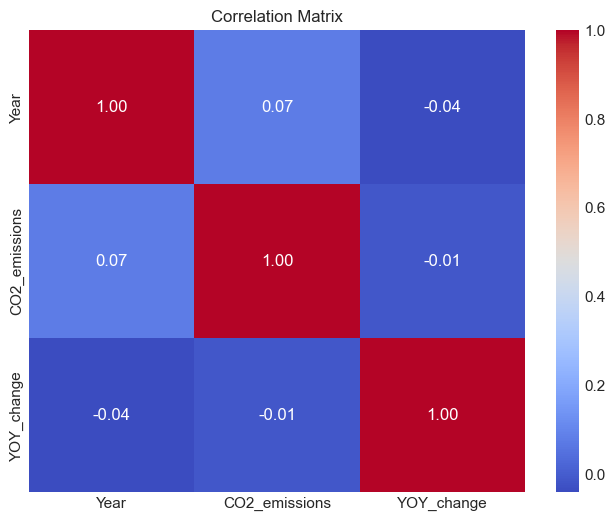

In [72]:
# Correlation matrix
corr_matrix = df[['Year', 'CO2_emissions', 'YOY_change']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
# World map of CO2 emissions
fig = px.choropleth(df, 
                    locations="Country_Code", 
                    color="CO2_emissions", 
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Global CO2 Emissions Over Time')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

In [20]:
# Interactive line chart
fig = px.line(df_global, x='Year', y='CO2_emissions', title='Global CO2 Emissions Over Time')
fig.update_traces(mode='lines+markers')
fig.show()

In [39]:
# List of African country codes (ISO Alpha-3)
african_countries = ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 
                     'TCD', 'COM', 'COG', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 
                     'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 
                     'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ', 'NAM', 
                     'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 
                     'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE']

# Filter the dataset for African countries
df_africa = df[df['Country_Code'].isin(african_countries)]

# Display the first few rows to confirm
df_africa.head()

Country_Code Country  Year  CO2_emissions  YOY_change
240          AGO  Angola  1963       1151.438   -2.484472
241          AGO  Angola  1964       1224.778    6.369427
242          AGO  Angola  1965       1188.108   -2.994012
243          AGO  Angola  1966       1554.808   30.864198
244          AGO  Angola  1967        993.757  -36.084906

In [40]:
df.nunique().value_counts('Country').sum()

1.0

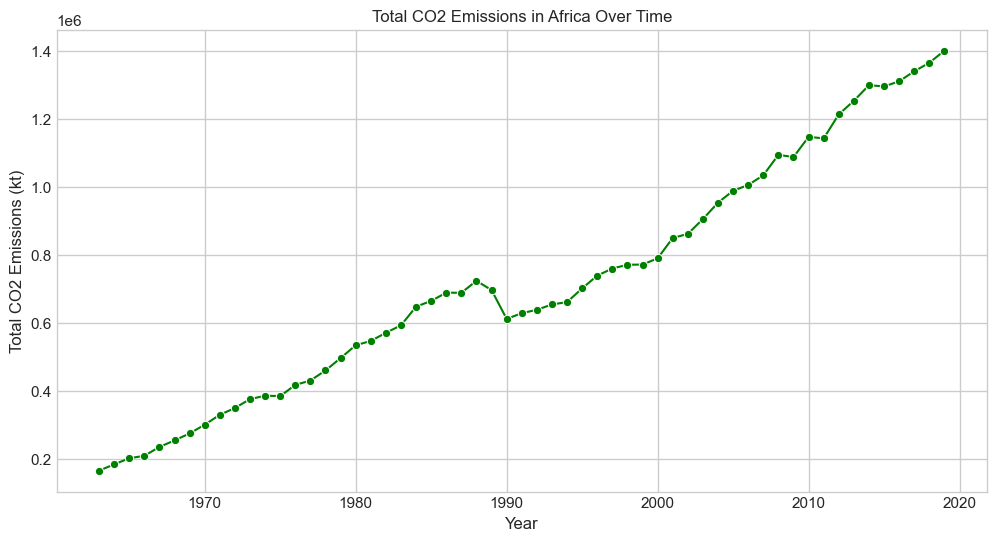

In [41]:
# CO2 emissions in Africa over time
df_africa_time = df_africa.groupby('Year')['CO2_emissions'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='CO2_emissions', data=df_africa_time, marker='o', color='green')
plt.title('Total CO2 Emissions in Africa Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kt)')
plt.show()

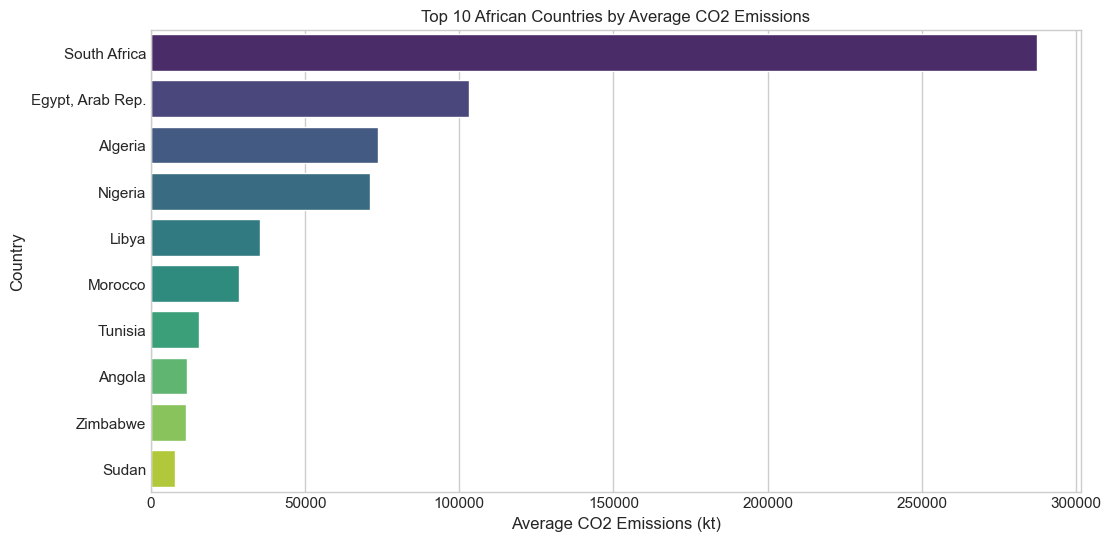

In [42]:
# Top 10 African countries by average CO2 emissions
top_african_countries = df_africa.groupby('Country')['CO2_emissions'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='CO2_emissions', y='Country', data=top_african_countries, palette='viridis')
plt.title('Top 10 African Countries by Average CO2 Emissions')
plt.xlabel('Average CO2 Emissions (kt)')
plt.ylabel('Country')
plt.show()

C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_3840\225276730.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_3840\225276730.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



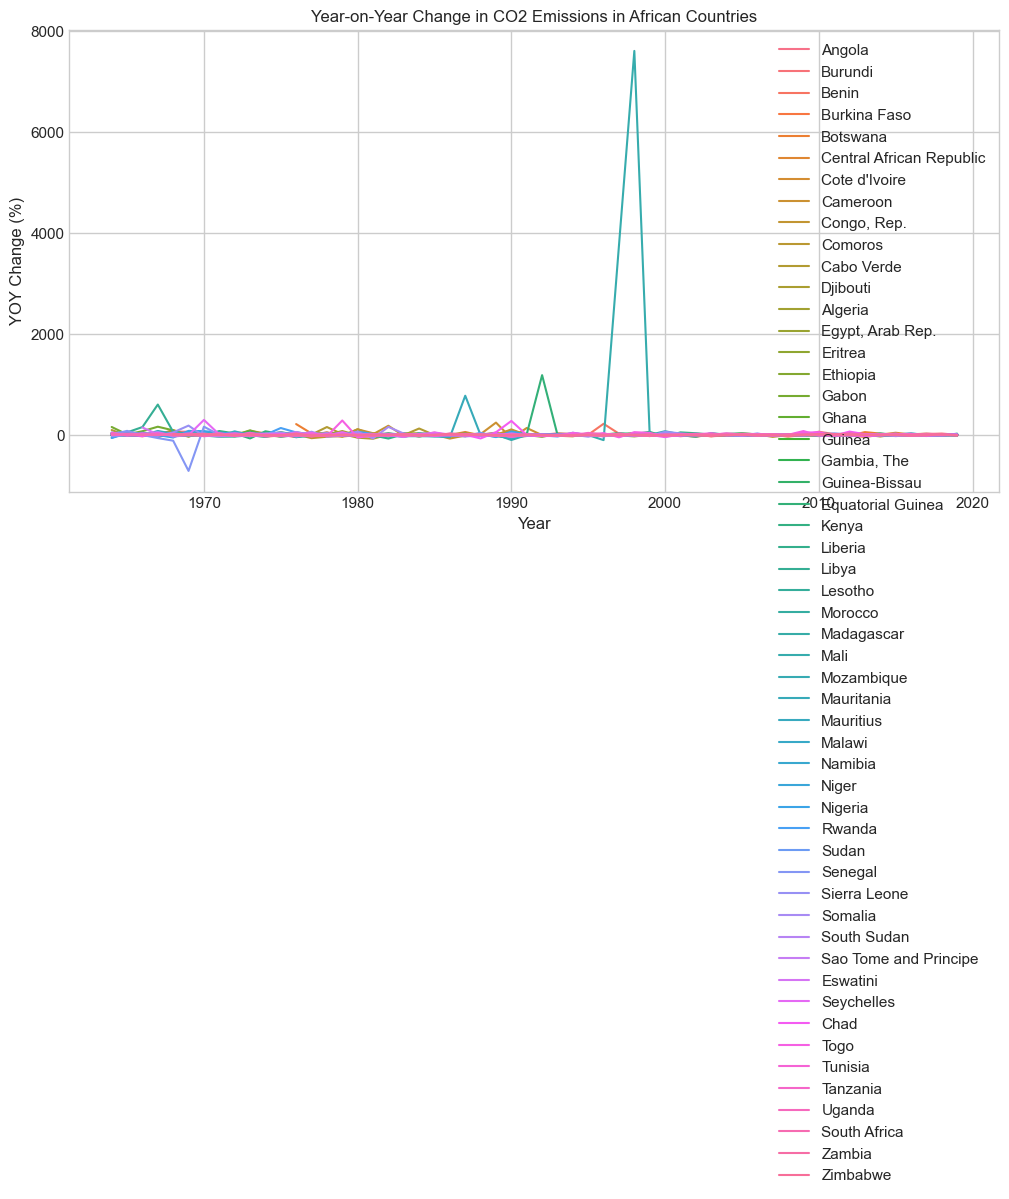

In [33]:
# Calculate year-on-year change in CO2 emissions for African countries
df_africa['YOY_change'] = df_africa.groupby('Country')['CO2_emissions'].pct_change() * 100

# Drop NaN values resulting from pct_change calculation
df_africa.dropna(subset=['YOY_change'], inplace=True)

# Visualize year-on-year change for Africa
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='YOY_change', hue='Country', data=df_africa)
plt.title('Year-on-Year Change in CO2 Emissions in African Countries')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.legend(loc='upper right')
plt.show()

In [34]:
# Interactive map of CO2 emissions in Africa
fig = px.choropleth(df_africa, 
                    locations="Country_Code", 
                    color="CO2_emissions", 
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='CO2 Emissions in Africa Over Time')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

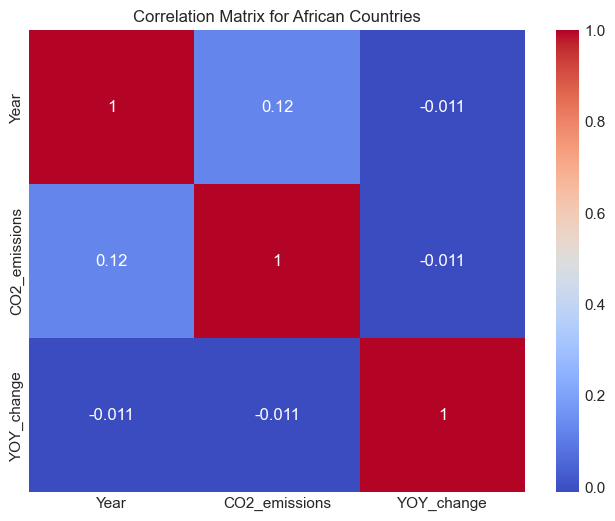

In [35]:
# Correlation matrix for African countries
corr_matrix_africa = df_africa[['Year', 'CO2_emissions', 'YOY_change']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_africa, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for African Countries')
plt.show()